<a href="https://colab.research.google.com/github/kamalzada/Machine-Learning-Projects/blob/master/gi_gl_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
#Importing useful libraries
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro 

In [124]:
df = pd.read_csv('GI_GL_corr (1).csv')

In [125]:
#Records that contain missing value(s)
df[df.isna().any(axis=1)] 

,product_name,glycemic_index(GI),glycemic_load


In [126]:
#Importing useful methods from a module
if __name__ == '__main__' and '__file__' not in globals():
  %run Utility_tools-checkpoint.ipynb 

In [122]:
pearson = check_pearson_corr(df, 'glycemic_index(GI)', 'glycemic_load')

In [128]:
#Calling methods one-by-one
pearson.pearson_corr_coef()

Pearson correlation coefficient without outlier handling: 0.6371106205824905
Pearson correlation coefficient with outlier handling: 0.6371106205824905


Checking for Linearity:



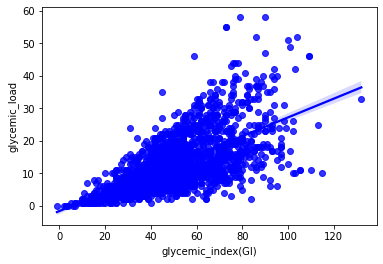

Shapiro-Wilk test for normality:

P-value for glycemic_index(GI) column: 6.483703600679291e-06

P-value for glycemic_load column: 4.006680958337093e-30

Checking for Gaussian distribution:



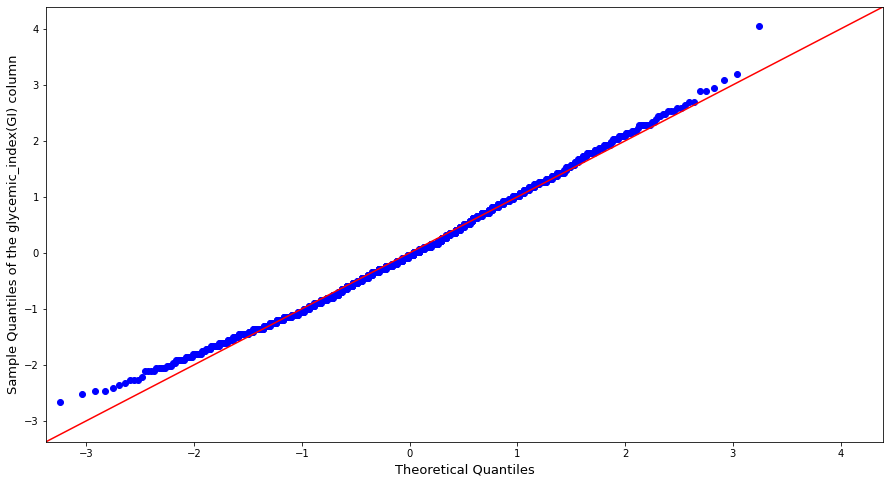

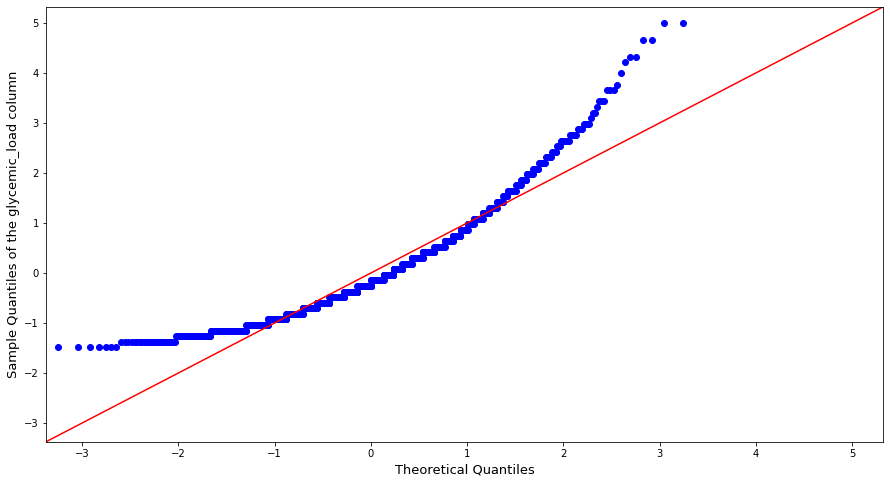

Checking outlier sensitivity:

Number of outlier records in glycemic_index(GI) column: 3
Number of outlier records in glycemic_load column: 19
Pearson correlation coefficient without outlier handling: 0.6371106205824905
Pearson correlation coefficient with outlier handling: 0.6371106205824905


In [129]:
#Calling and running all methods in the class
attrs = (getattr(pearson, func) for func in dir(pearson) if callable(getattr(pearson, func)))
methods = filter(inspect.ismethod, attrs)

for method in methods:
  try:
    method()
  except TypeError:
    pass

In [ ]:
df_low = df[df['glycemic_load']<=10] 
df_med = df[(df['glycemic_load']>=11) & (df['glycemic_load']<=19)] 
df_high = df[df['glycemic_load']>=20]  
df_low['GL_interval'] = 'low' 
df_med['GL_interval'] = 'medium' 
df_high['GL_interval'] = 'high' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df = pd.concat([df_low, df_med, df_high], axis=0).reset_index(drop=True)
df.head()

,product_name,glycemic_index(GI),glycemic_load,GL_interval
0,"Pound cake 0% (Bimbo S.A de C.V, Mexico",38.0,9.0,low
1,"Bavarian (mousse filling on biscuit base), Cho...",31.0,6.0,low
2,"Apple muffin, made rolled oats and without sugar",48.0,9.0,low
3,"Muffin, reduced-fat, low-calorie, made from",37.0,9.0,low
4,"Scones, plain, made from packet mix",92.0,8.0,low
